In [1]:
import requests
from requests.auth import HTTPBasicAuth
import pandas as pd

# Define the endpoint and parameters
baselink = 'https://api.octopus.energy'

# Define the authentication details
auth = HTTPBasicAuth('', '')
auth_zsolt = HTTPBasicAuth('', '')

In [2]:
urlMeter = f"{baselink}/v1/electricity-meter-points/1413985791007/meters/21J0016813/consumption/"
urlMeter_zsolt = f"{baselink}/v1/electricity-meter-points/1413985791007/meters/21J0016813/consumption/"

params = {
    "period_from": "2024-01-01T00:00:00",
    "period_to": "2024-06-30T00:00:00",
    "page_size": 2000
}

# Make the request
response = requests.get(urlMeter, params=params, auth=auth)
# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    
    consumption_data = data['results']
    df = pd.DataFrame(consumption_data)
else:
    print(f"Request failed with status code {response.status_code}: {response.text}")

df

,consumption,interval_start,interval_end
0,0.000,2024-06-30T00:00:00+01:00,2024-06-30T00:30:00+01:00
1,0.000,2024-06-29T23:30:00+01:00,2024-06-30T00:00:00+01:00
2,0.000,2024-06-29T23:00:00+01:00,2024-06-29T23:30:00+01:00
3,0.000,2024-06-29T22:30:00+01:00,2024-06-29T23:00:00+01:00
4,0.001,2024-06-29T22:00:00+01:00,2024-06-29T22:30:00+01:00
...,...,...,...
1995,0.012,2024-05-19T10:30:00+01:00,2024-05-19T11:00:00+01:00
1996,0.007,2024-05-19T10:00:00+01:00,2024-05-19T10:30:00+01:00
1997,0.006,2024-05-19T09:30:00+01:00,2024-05-19T10:00:00+01:00
1998,0.002,2024-05-19T09:00:00+01:00,2024-05-19T09:30:00+01:00


In [3]:
productsUrl = f'{baselink}/v1/products/'
response = requests.get(productsUrl,  auth=auth)
# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    
    consumption_data = data['results']
    df = pd.DataFrame(consumption_data)
else:
    print(f"Request failed with status code {response.status_code}: {response.text}")
    
export_df = df[df['direction'] == 'EXPORT']
import_df = df[df['direction'] == 'IMPORT']

import_df

,code,direction,full_name,display_name,description,is_variable,is_green,is_tracker,is_prepay,is_business,is_restricted,term,available_from,available_to,links,brand
0,AGILE-24-04-03,IMPORT,Agile Octopus April 2024 v1,Agile Octopus,"With Agile Octopus, you get access to half-hou...",True,True,False,False,False,False,12.0,2024-04-03T00:00:00+01:00,None,[{'href': 'https://api.octopus.energy/v1/produ...,OCTOPUS_ENERGY
1,AGILE-BB-24-04-03,IMPORT,Agile Octopus April 2024 v1,Agile Octopus,"With Agile Octopus, you get access to half-hou...",True,True,False,False,False,False,12.0,2024-04-03T00:00:00+01:00,None,[{'href': 'https://api.octopus.energy/v1/produ...,BULB
4,COOP-FIX-12M-24-06-28,IMPORT,Co-op 12M Fixed June 2024 v4,Co-op 12M Fixed,This tariff features 100% renewable electricit...,False,False,False,False,False,False,12.0,2024-06-28T00:00:00+01:00,None,[{'href': 'https://api.octopus.energy/v1/produ...,COOP_ENERGY
5,COOP-PP-VAR-20-04-01,IMPORT,Co-op Key and Card,Co-op Key and Card,Non-smart prepayment tariff,True,False,False,True,False,False,NaN,2020-03-03T00:00:00Z,None,[{'href': 'https://api.octopus.energy/v1/produ...,COOP_ENERGY
8,COOP-VAR-23-04-01,IMPORT,Co-op Flexible,Co-op Flexible,Co-op Flexible offers great value and 100% ren...,True,False,False,False,False,False,NaN,2023-04-01T00:00:00+01:00,None,[{'href': 'https://api.octopus.energy/v1/produ...,COOP_ENERGY
9,COSY-22-12-08,IMPORT,Cosy Octopus,Cosy Octopus,Cosy Octopus is a heat pump tariff with six ho...,True,False,False,False,False,False,NaN,2022-12-13T00:00:00Z,None,[{'href': 'https://api.octopus.energy/v1/produ...,OCTOPUS_ENERGY
10,COSY-BB-23-02-07,IMPORT,Cosy Octopus,Cosy Octopus,Cosy Octopus is a heat pump tariff with six ho...,True,False,False,False,False,False,NaN,2023-02-07T00:00:00Z,None,[{'href': 'https://api.octopus.energy/v1/produ...,BULB
11,CP-12M-24-06-28,IMPORT,Co-op Community Power 12M Fixed June 2024 v4,Co-op Community Power,This tariff features 100% renewable electricit...,False,True,False,False,False,False,12.0,2024-06-28T00:00:00+01:00,None,[{'href': 'https://api.octopus.energy/v1/produ...,COOP_ENERGY
14,FLUX-IMPORT-23-02-14,IMPORT,Octopus Flux Import,Octopus Flux Import,Power your home with 100% renewable energy on ...,True,False,False,False,False,False,NaN,2023-02-14T00:00:00Z,None,[{'href': 'https://api.octopus.energy/v1/produ...,OCTOPUS_ENERGY
15,FLUX-IMPORT-BB-23-02-14,IMPORT,Octopus Flux Import,Octopus Flux Import,Power your home with 100% renewable energy on ...,True,False,False,False,False,False,NaN,2023-02-14T00:00:00Z,None,[{'href': 'https://api.octopus.energy/v1/produ...,BULB


In [32]:
def scrape_product(prodcut_code):
    productsUrl = f'{baselink}/v1/products/{prodcut_code}'
    response = requests.get(productsUrl,  auth=auth)
    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()
        
        tariff_price = data['single_register_electricity_tariffs']['_A']
        the_key = list(data['single_register_electricity_tariffs']['_A'].keys())[0]
        prices = tariff_price[the_key]
        # single_tariffs = data['single_register_electricity_tariffs']['varying']
        # dual_register_electricity_tariffs = data['dual_register_electricity_tariffs']['varying']
        # single_register_gas_tariffs = data['single_register_gas_tariffs']['varying']
        # result = pd.DataFrame(data)
        return None
    else:
        print(f"Request failed with status code {response.status_code}: {response.text}")
        
df = scrape_product('VAR-BB-23-04-01')
df

KeyboardInterrupt: 

In [30]:
for index, row in import_df.iterrows():
    print(f'Downloading the tariff: {row["code"]}')
    scrape_product(row["code"])
    

['direct_debit_monthly']
['direct_debit_monthly']
['direct_debit_monthly']
['prepayment']
['varying']
['direct_debit_monthly']
['direct_debit_monthly']
['direct_debit_monthly']
['direct_debit_monthly']
['direct_debit_monthly']
['direct_debit_monthly']
['direct_debit_monthly']
['direct_debit_monthly']
['direct_debit_monthly']
['direct_debit_monthly']
['direct_debit_monthly']
['direct_debit_monthly']
['varying']
['direct_debit_monthly']
['direct_debit_monthly']
['prepayment']
['prepayment']
['varying']
['varying']


In [ ]:
# def select_best_tariff(import_df, export_df):
    

In [11]:
productsUrl = f'{baselink}/v1/accounts/'
response = requests.get(productsUrl, auth=auth)
# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    
    consumption_data = data['results']
    df = pd.DataFrame(consumption_data)
    print(data)
else:
    print(f"Request failed with status code {response.status_code}: {response.text}")


Request failed with status code 403: {"detail":"You do not have permission to perform this action."}


In [5]:
firdege_comsumption = []

In [6]:
import random
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Define the time range for one day in hourly intervals
time_range = pd.date_range(start="2024-01-01", end="2024-01-02", freq='H')[:-1]

# Generate made-up consumption values (in kWh) for each hour
# Assuming average consumption is around 0.083 kWh per hour (2 kWh per day)
np.random.seed(0)  # For reproducibility
consumption_values = np.random.uniform(0.05, 0.1, len(time_range))  # Random values between 0.05 and 0.1 kWh

random_value = random.randint(1, 4)
new_consumption_values = consumption_values * 0.4


# Create a DataFrame
df = pd.DataFrame({
    'timeframe': time_range,
    'consumption': consumption_values,
    'new_consumption': np.random.uniform(0.001, 0.4, len(time_range)),
    'current_tariff': 12,
    'best_tariff': 7
})

df['new_consumption'] = df['consumption'] * df['new_consumption']
df['current_cost'] = df['consumption'] * df['current_tariff']
df['new_cost'] = df['new_consumption'] * df['best_tariff']
df['profit'] = df['current_cost'] - df['new_cost']

# Display the DataFrame
df

,timeframe,consumption,new_consumption,current_tariff,best_tariff,current_cost,new_cost,profit
0,2024-01-01 00:00:00,0.077441,0.048191,12,7,0.929288,0.337340,0.591948
1,2024-01-01 01:00:00,0.085759,0.256328,12,7,1.029114,1.794299,-0.765186
2,2024-01-01 02:00:00,0.080138,0.058198,12,7,0.961658,0.407386,0.554272
3,2024-01-01 03:00:00,0.077244,0.377923,12,7,0.926930,2.645460,-1.718530
4,2024-01-01 04:00:00,0.071183,0.209217,12,7,0.854193,1.464522,-0.610329
5,2024-01-01 05:00:00,0.082295,0.166450,12,7,0.987536,1.165151,-0.177614
6,2024-01-01 06:00:00,0.071879,0.106558,12,7,0.862552,0.745904,0.116649
7,2024-01-01 07:00:00,0.094589,0.309919,12,7,1.135064,2.169435,-1.034371
8,2024-01-01 08:00:00,0.098183,0.183004,12,7,1.178198,1.281028,-0.102830
9,2024-01-01 09:00:00,0.069172,0.227805,12,7,0.830065,1.594636,-0.764571


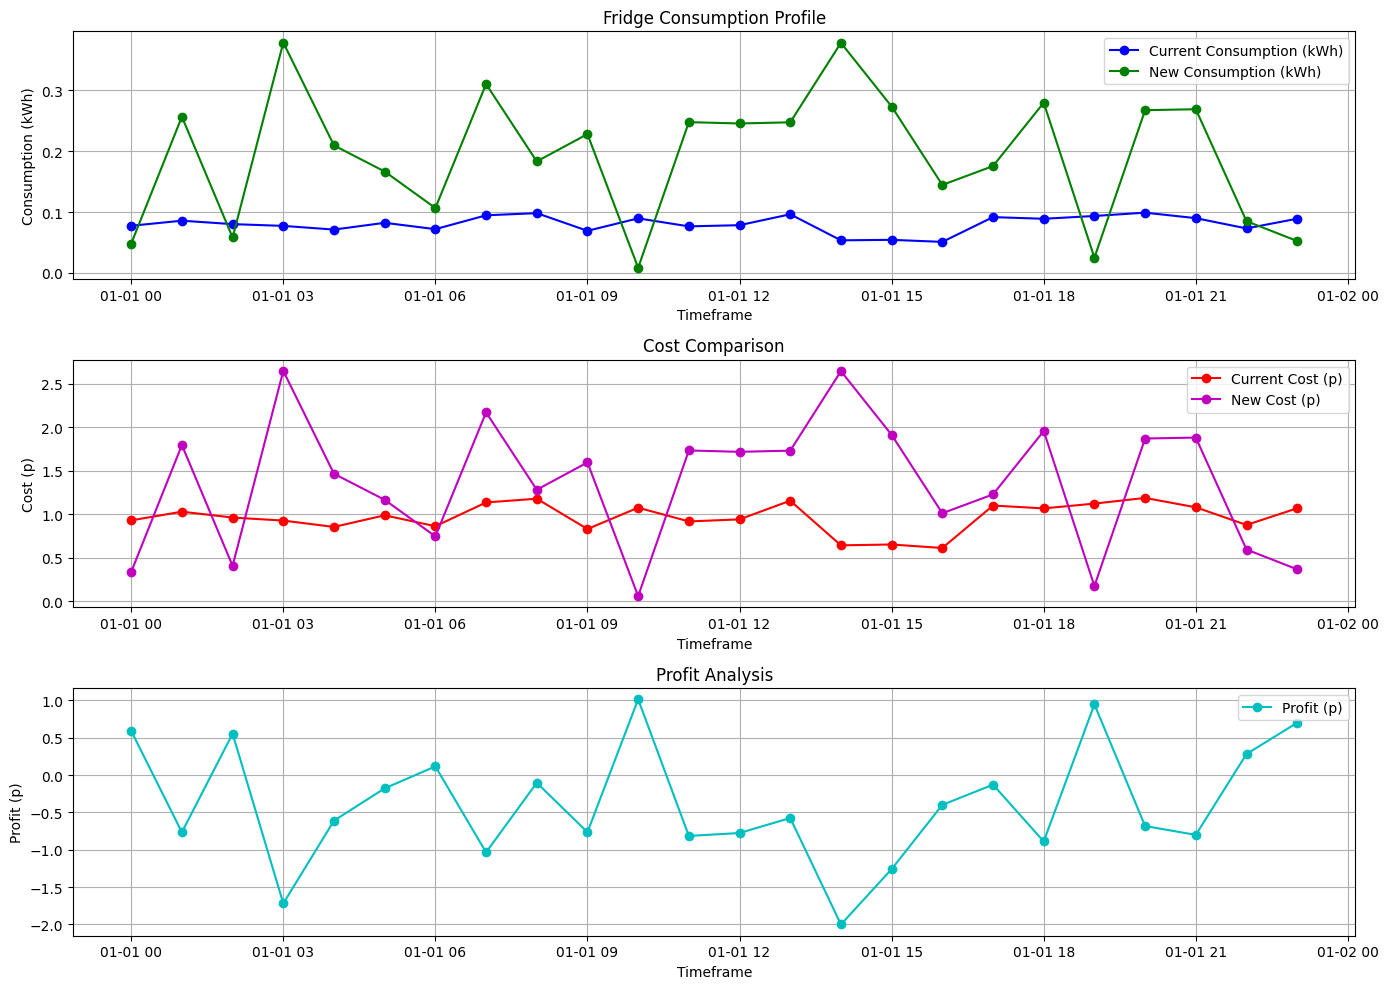

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(14, 10))

# Plot consumption values
plt.subplot(3, 1, 1)
plt.plot(df['timeframe'], df['consumption'], label='Current Consumption (kWh)', color='b', marker='o')
plt.plot(df['timeframe'], df['new_consumption'], label='New Consumption (kWh)', color='g', marker='o')
plt.xlabel('Timeframe')
plt.ylabel('Consumption (kWh)')
plt.title('Fridge Consumption Profile')
plt.legend()
plt.grid(True)

# Plot cost values
plt.subplot(3, 1, 2)
plt.plot(df['timeframe'], df['current_cost'], label='Current Cost (p)', color='r', marker='o')
plt.plot(df['timeframe'], df['new_cost'], label='New Cost (p)', color='m', marker='o')
plt.xlabel('Timeframe')
plt.ylabel('Cost (p)')
plt.title('Cost Comparison')
plt.legend()
plt.grid(True)

# Plot profit values
plt.subplot(3, 1, 3)
plt.plot(df['timeframe'], df['profit'], label='Profit (p)', color='c', marker='o')
plt.xlabel('Timeframe')
plt.ylabel('Profit (p)')
plt.title('Profit Analysis')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [6]:
import pandas as pd
import numpy as np

# Simulate input data for hourly import/export tariffs and energy market prices
np.random.seed(0)  # For reproducibility

# Create a DataFrame with hourly prices for a week (24 hours * 7 days)
hours = pd.date_range(start="2024-01-01", end="2024-01-08", freq="H")
market_prices = np.random.uniform(0.08, 0.25, len(hours))  # Market prices in $/kWh

# Create multiple import/export tariffs (3 options each for simplicity)
import_tariff_options = [
    {
        "prices": np.random.uniform(0.10, 0.20, len(hours)),
        "exit_fee": 50,
        "contract_term": 7  # days
    },
    {
        "prices": np.random.uniform(0.15, 0.25, len(hours)),
        "exit_fee": 75,
        "contract_term": 10  # days
    },
    {
        "prices": np.random.uniform(0.20, 0.30, len(hours)),
        "exit_fee": 100,
        "contract_term": 14  # days
    }
]

export_tariff_options = [
    {
        "prices": np.random.uniform(0.05, 0.10, len(hours)),
        "exit_fee": 30,
        "contract_term": 7  # days
    },
    {
        "prices": np.random.uniform(0.07, 0.12, len(hours)),
        "exit_fee": 45,
        "contract_term": 10  # days
    },
    {
        "prices": np.random.uniform(0.10, 0.15, len(hours)),
        "exit_fee": 60,
        "contract_term": 14  # days
    }
]

# Create a DataFrame
tariffs_df = pd.DataFrame({
    "Hour": hours,
    # "MarketPrice":  market_prices,
    "MarketPrice": export_tariff_options[0]['prices'] * 100
})

# Define consumer profile (e.g., hourly consumption in kWh)
consumer_profile = np.random.uniform(-1, 1, len(hours))  # Negative for export, positive for import

# Add consumer profile to the DataFrame
tariffs_df["Consumption"] = consumer_profile

# Define a function to calculate the cost for a given set of tariffs
def calculate_cost(tariffs_df, import_tariff, export_tariff, start_hour, end_hour, use_market_prices=False):
    period = slice(start_hour, end_hour + 1)
    if use_market_prices:
        cost = np.where(
            tariffs_df["Consumption"].values[period] > 0,
            tariffs_df["Consumption"].values[period] * tariffs_df["MarketPrice"].values[period],
            tariffs_df["Consumption"].values[period] * tariffs_df["MarketPrice"].values[period]
        )
    else:
        cost = np.where(
            tariffs_df["Consumption"].values[period] > 0,
            tariffs_df["Consumption"].values[period] * import_tariff["prices"][period],
            tariffs_df["Consumption"].values[period] * export_tariff["prices"][period]
        )
    return np.sum(cost)

# Function to find the best sequence of tariffs
def find_best_tariff_sequence(tariffs_df, import_tariff_options, export_tariff_options, market_prices):
    n_hours = len(tariffs_df)
    dp = np.full(n_hours + 1, float('inf'))
    dp[0] = 0
    sequence = [None] * (n_hours + 1)

    for i in range(n_hours):
        for import_tariff in import_tariff_options:
            for export_tariff in export_tariff_options:
                contract_term_hours = min(import_tariff["contract_term"], export_tariff["contract_term"]) * 24
                end_hour = min(i + contract_term_hours, n_hours)

                cost = calculate_cost(tariffs_df, import_tariff, export_tariff, i, end_hour - 1)

                if i > 0 and sequence[i] is not None and sequence[i][:2] != (import_tariff["exit_fee"], export_tariff["exit_fee"]):
                    cost += import_tariff["exit_fee"] + export_tariff["exit_fee"]

                if dp[end_hour] > dp[i] + cost:
                    dp[end_hour] = dp[i] + cost
                    sequence[end_hour] = (import_tariff, export_tariff, i)

        # Consider using market prices
        market_cost = calculate_cost(tariffs_df, None, None, i, n_hours - 1, use_market_prices=True)
        if dp[n_hours] > dp[i] + market_cost:
            dp[n_hours] = dp[i] + market_cost
            sequence[n_hours] = ("Market Prices", None, i)

    # Reconstruct the sequence
    current_hour = n_hours
    tariff_sequence = []
    while current_hour > 0:
        tariff, _, start_hour = sequence[current_hour]
        tariff_sequence.append((tariff, start_hour, current_hour))
        current_hour = start_hour

    tariff_sequence.reverse()
    return dp[n_hours], tariff_sequence

# Find the best sequence of tariffs
total_cost, best_sequence = find_best_tariff_sequence(tariffs_df, import_tariff_options, export_tariff_options, market_prices)

# Display the results
print(f"Total Cost: ${total_cost:.2f}")
print("Tariff Sequence:")
for tariff, start_hour, end_hour in best_sequence:
    if tariff == "Market Prices":
        print(f"From {start_hour} to {end_hour} hours: Market Prices")
    else:
        print(f"From {start_hour} to {end_hour} hours: Import Tariff - Exit Fee: {tariff['exit_fee']}, Contract Term: {tariff['contract_term']} days")

# Optional: Display the DataFrame with the best tariffs
for i, (tariff, start_hour, end_hour) in enumerate(best_sequence):
    if tariff == "Market Prices":
        tariffs_df.loc[start_hour:end_hour-1, f"BestTariff_{i}"] = "Market Prices"
    else:
        tariffs_df.loc[start_hour:end_hour-1, f"BestImportTariff_{i}"] = tariff["prices"][start_hour:end_hour]
        tariffs_df.loc[start_hour:end_hour-1, f"BestExportTariff_{i}"] = tariff["prices"][start_hour:end_hour]

print(tariffs_df)

Total Cost: $-0.11
Tariff Sequence:
From 0 to 168 hours: Import Tariff - Exit Fee: 50, Contract Term: 7 days
From 168 to 169 hours: Market Prices
                   Hour  MarketPrice  Consumption  BestImportTariff_0  \
0   2024-01-01 00:00:00     8.631712    -0.153891            0.117163   
1   2024-01-01 01:00:00     7.684615    -0.602018            0.152104   
2   2024-01-01 02:00:00     5.552386    -0.265049            0.105434   
3   2024-01-01 03:00:00     7.025178     0.413744            0.120000   
4   2024-01-01 04:00:00     7.026868     0.299068            0.101852   
..                  ...          ...          ...                 ...   
164 2024-01-07 20:00:00     7.090546    -0.251875            0.169700   
165 2024-01-07 21:00:00     5.864757    -0.172440            0.177870   
166 2024-01-07 22:00:00     5.536054     0.372760            0.177741   
167 2024-01-07 23:00:00     9.086696    -0.408216            0.125942   
168 2024-01-08 00:00:00     7.365715    -0.393416  